# Henon map

In [50]:
import numpy as np
import matplotlib.pyplot as plt

def henon_map(x, y, a, b):
    x_n1 = 1 - a * x**2 + y
    y_n1 = b * x
    return x_n1, y_n1

def get_henon_mesurements(x=0, y=0, a=1.4, b=0.3, num_points=10000, return_single_matrix=False):
    x_values = np.zeros(num_points)
    y_values = np.zeros(num_points)

    x_values[0] = x
    y_values[0] = y

    for i in range(1, num_points):
        x_values[i], y_values[i] = henon_map(x_values[i-1], y_values[i-1], a, b)

    if return_single_matrix:
        return np.vstack((x_values, y_values)).T
    else:
        return x_values, y_values


# Generate time series data for the Hénon system
num_points = 1000
a = 1.4
b = 0.3

x_values = np.zeros(num_points)
y_values = np.zeros(num_points)

for i in range(1, num_points):
    x_values[i], y_values[i] = henon_map(x_values[i-1], y_values[i-1], a, b)




# Central difference

In [51]:

# Calculate discrete differences to approximate derivatives
dx = np.diff(x_values)
dy = np.diff(y_values)

In [52]:
def central_difference(X, h=1):
    dx = np.zeros([len(X)-2] )
    for i in range(1, len(X)-1):
        dx[i-1] = (X[i+1] - X[i-1]) / (2*h)
    return dx


In [53]:
ndx = central_difference(x_values)
ndy = central_difference(y_values)

# Plot

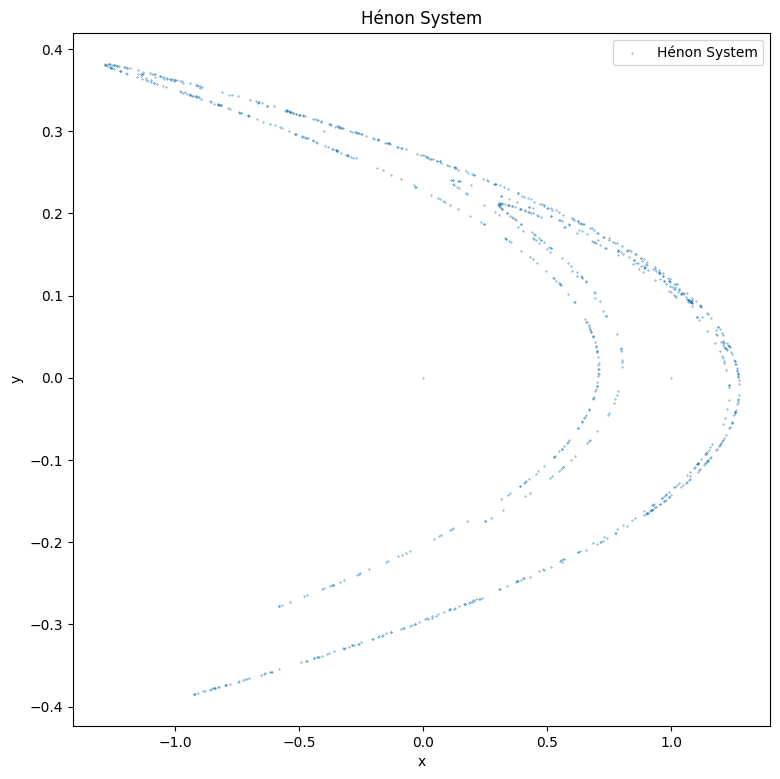

In [54]:
# Scatter plots for the Hénon system and its derivatives with a wider aspect ratio
plt.figure(figsize=(9, 9))

plt.scatter(x_values, y_values, label='Hénon System', s=.1)
plt.title('Hénon System')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

Text(0.5, 1.0, 'x time series')

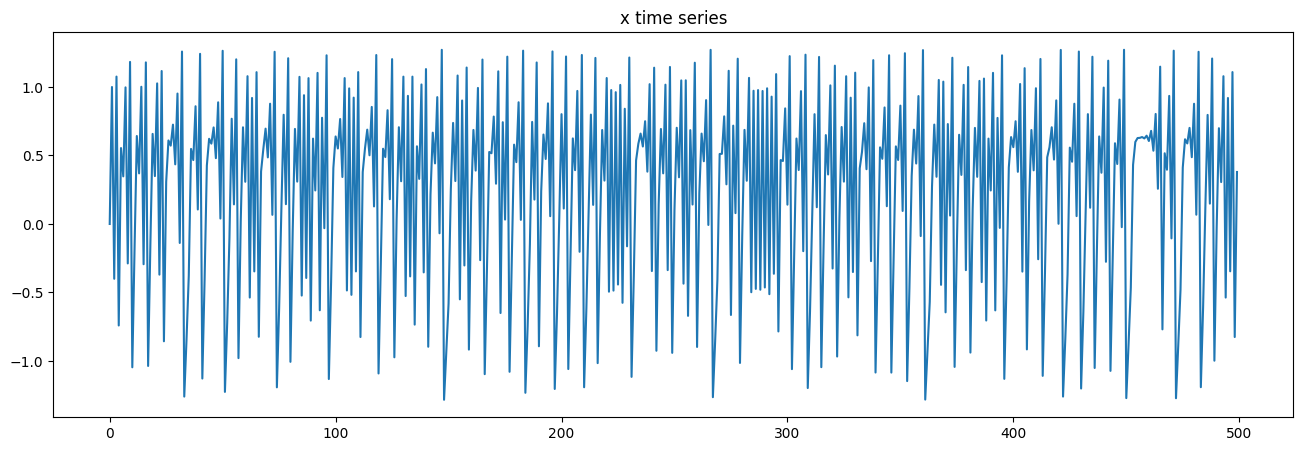

In [55]:
plt.figure(figsize=(16, 5))
plt.plot(range(500), x_values[:500], label='x time series')
plt.title('x time series')

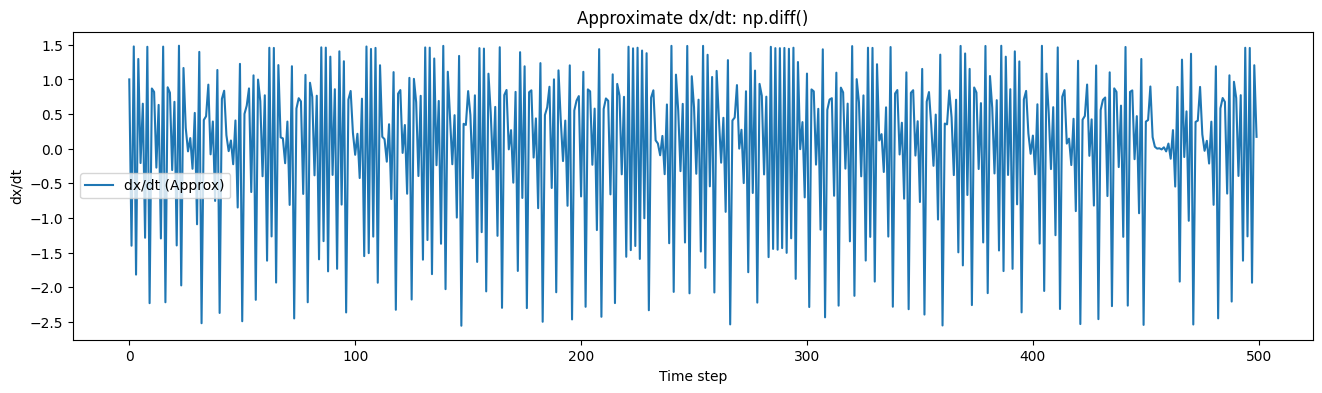

In [56]:
plt.figure(figsize=(16, 4))

plt.plot(range(len(dx[:500])), dx[:500], label='dx/dt (Approx)')
plt.title('Approximate dx/dt: np.diff()')
plt.xlabel('Time step')
plt.ylabel('dx/dt')
plt.legend()

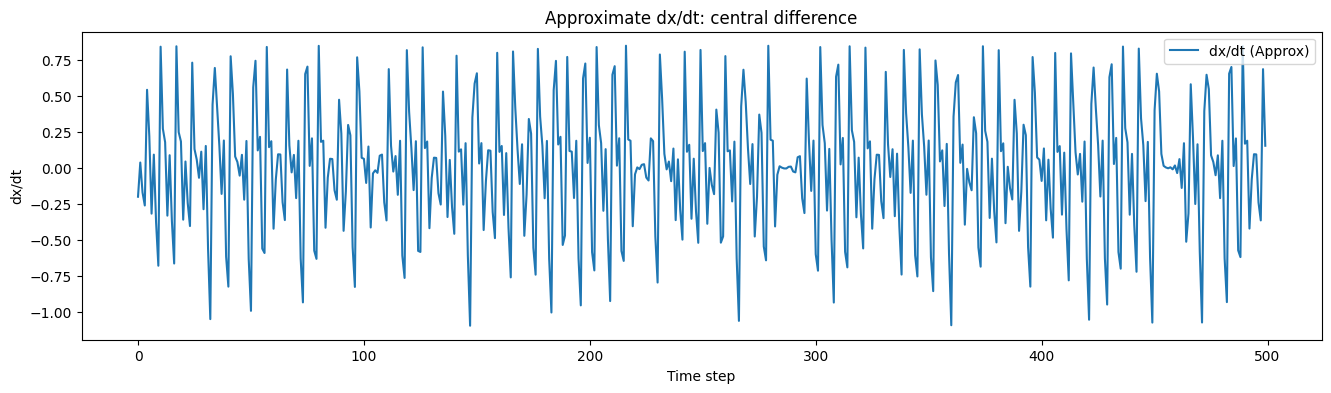

In [57]:
plt.figure(figsize=(16, 4))

plt.plot(range(len(ndx[:500])), ndx[:500], label='dx/dt (Approx)')
plt.title('Approximate dx/dt: central difference')
plt.xlabel('Time step')
plt.ylabel('dx/dt')
plt.legend()

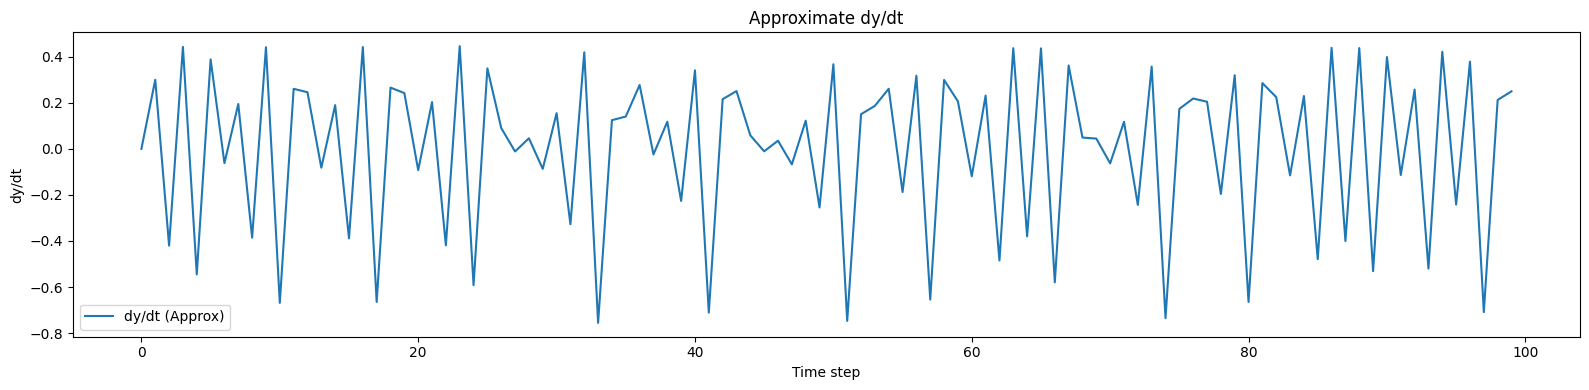

In [58]:
plt.figure(figsize=(16, 4))

plt.plot(range(len(dy[:100])), dy[:100], label='dy/dt (Approx)')
plt.title('Approximate dy/dt')
plt.xlabel('Time step')
plt.ylabel('dy/dt')
plt.legend()

plt.tight_layout()
plt.show()


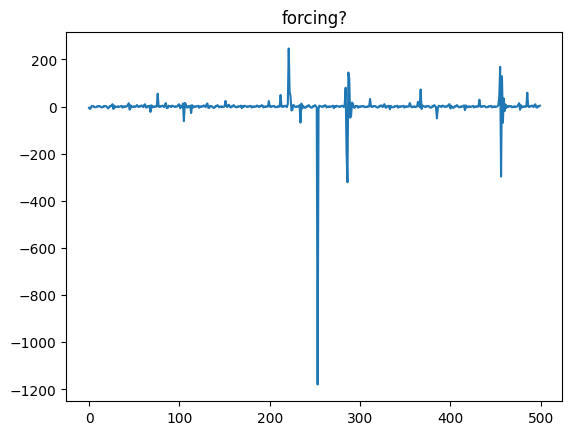

In [59]:
idk = x_values[1:-1] / ndx
plt.title('forcing?')

#plt.plot(np.abs(idk[:]))
plt.plot(idk[:500])

# Takens reconstruction

Using only x values of the henon map, we are able to reconstruct the map. Simularly to the [lorenz attractor] Using 3 different observation functions, creating a 3d map. rotating and

Text(0.5, 0.92, 'Taken´s Embedding Approach with tau= 1')

<Figure size 1600x500 with 0 Axes>

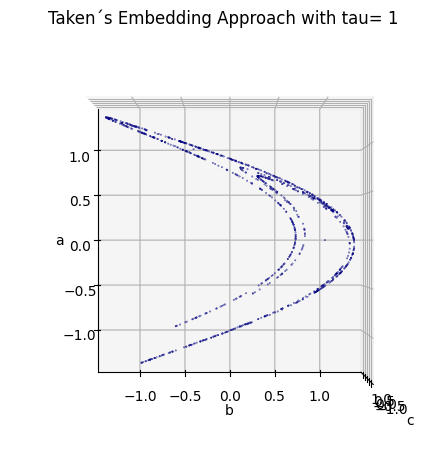

In [60]:
plt.figure(figsize=(16, 5))


X = x_values
#plt.plot(range(500), X[:500], label='x time series')

tau=1  # time delay between observation functions

# Observation functions. 3 required for the Lorenz attractor.
a= X[:-2*tau] 
b= X[tau:-tau]
c= X[2*tau:]

# Plot Takens Delay Time Embedding
fig = plt.figure()
fig.set_tight_layout(True)
ax = fig.add_subplot(projection="3d")
ax.scatter(xs=a, ys=b, zs=c, color="navy", alpha=0.85, s=0.1)
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('c')
ax.view_init(elev=270, azim=180)
ax.set_title("Taken´s Embedding Approach with tau= " + str(tau))

# Same can be done for Y,Z coordinates. Behaviour is similar to that shown in part 3.
# Hankel delay embeddings give better reconstructions. See Broomhead 1986.

In [61]:
np.max(y_values)/np.max(a)

0.3

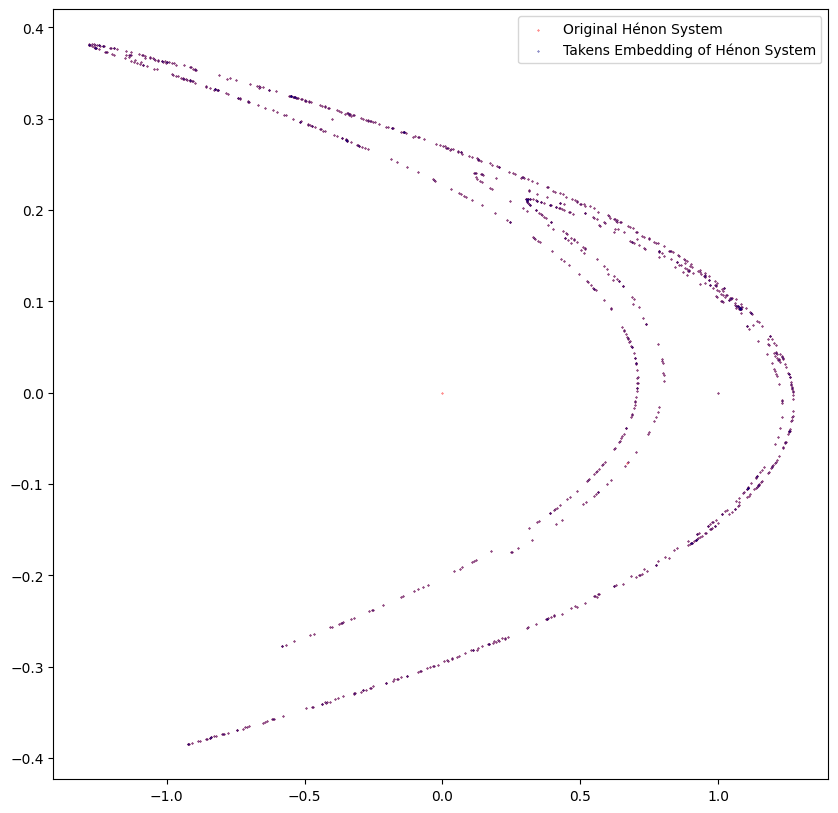

In [62]:
plt.figure(figsize=(10, 10))

plt.scatter(x_values, y_values, s=0.1, c='red', label='Original Hénon System')
plt.scatter(b, a*0.3, s=0.1, c='navy', label='Takens Embedding of Hénon System')
plt.legend()    





# rossz ut

## compute derivatives of V
I use central diff, Brunton uses fourth order central difference

Do we even need this in descrete time??

In [63]:
# dv = np.zeros([len(V), len(V[0])-2])

# for i in range(len(V)):
#     dv[i, :] = central_difference(V[i, :])

https://stackoverflow.com/questions/33559946/numpy-vs-mldivide-matlab-operator

Kivalasztjuk az elso r elemet V osszes sorabol

In [64]:
# r = 3
# x = V[:-1, :r]
# xprime = V[1:,:r]

# #Xi = xprime\x
# Xi = np.linalg.lstsq(xprime, x, rcond=None)[0]

# B = Xi[:r-1,r-1]
# A = Xi[:r-1,:r-2]

# A.shape, B.shape, Xi.shape

# Hankel delay embedding for x

## Hankel matrix

In [65]:
# stackmax = 10

# H = np.zeros([stackmax, len(x_values)-stackmax])
# for i in range(stackmax):
#     H[i, :] = x_values[i:-(stackmax-i)]

# H.shape
# H[:5, :5]

## SVD

In [66]:
# U, S, Vt = np.linalg.svd(H)

# V = Vt.T

how can we find the right columns of V

In [67]:
# # Shadow attractor
# fig = plt.figure()
# fig.set_tight_layout(True)
# ax = fig.add_subplot(projection='3d')
# ax.scatter(V[:, 0], V[:, 1], V[:, 2], s=0.1, label='Hankel reconstructed attractor', marker='.')
# #plt.legend()
# ax.view_init(elev=0, azim=0)
# ax.xaxis.set_rotate_label(False) 
# ax.set_xlabel('$v_1$', fontsize=15)
# ax.yaxis.set_rotate_label(False) 
# ax.set_ylabel('$v_2$', fontsize=15)
# ax.zaxis.set_rotate_label(False) 
# ax.set_zlabel('$v_3$', fontsize=15, rotation = 0)
# ax.set_title("X-shadow attractor", fontsize=35)
# # plt.setp(ax.get_xticklabels(), visible=False)
# # plt.setp(ax.get_yticklabels(), visible=False)
# # plt.setp(ax.get_zticklabels(), visible=False)


# Hankel delay embedding for y

## Hankel matrix

In [68]:
stackmax = 10

H = np.zeros([stackmax, len(x_values)-stackmax])
for i in range(stackmax):
    H[i, :] = y_values[i:-(stackmax-i)]

## SVD

In [69]:
U, S, Vt = np.linalg.svd(H)

V = Vt.T

In [70]:
# # Shadow attractor
# fig = plt.figure()
# fig.set_tight_layout(True)
# ax = fig.add_subplot(projection='3d')
# ax.scatter(V[:, 0], V[:, 1], V[:, 2], s=0.1, label='Hankel reconstructed attractor')
# #plt.legend()
# ax.view_init(elev=0, azim=0)
# ax.xaxis.set_rotate_label(False) 
# ax.set_xlabel('$v_1$', fontsize=15)
# ax.yaxis.set_rotate_label(False) 
# ax.set_ylabel('$v_2$', fontsize=15)
# ax.zaxis.set_rotate_label(False) 
# ax.set_zlabel('$v_3$', fontsize=15, rotation = 0)
# ax.set_title("Y-shadow attractor", fontsize=35)
# # plt.setp(ax.get_xticklabels(), visible=False)
# # plt.setp(ax.get_yticklabels(), visible=False)
# # plt.setp(ax.get_zticklabels(), visible=False)


In [71]:
# plt.figure(figsize=(2, 2))

# plt.scatter(V[:, 0], V[:, 1], s=0.1, c='red', label='henon system reconstruction', marker='.')
# plt.legend()    



In [72]:
V.shape

(990, 990)

In [73]:
# num_columns = 10
# num_rows = (num_columns * num_columns // 10)

# plt.figure(figsize=(15, 200))
# row_count = 0

# for j in range(num_columns):
#     for i in range(num_columns):
#         plt.subplot(num_rows, 10, row_count + 1)
#         plt.scatter(V[:, j], V[:, i], s=0.1, marker=".")
#         plt.title(f'Column {j} vs. Column {i}')
#         plt.xlabel(f'Column {j}')
#         plt.ylabel(f'Column {i}')
#         row_count += 1


# plt.tight_layout()
# plt.show()


Derivate V

In [74]:
r = 10

dV = np.zeros([len(V[0])-2, r])

for i in range(r):
    dV[:, i] = central_difference(V[:, i])

In [75]:
dV
dV.shape

(988, 10)

In [76]:
# num_columns = 10
# num_rows = (num_columns * num_columns // 5)

# plt.figure(figsize=(15, 70))
# row_count = 0

# for j in range(num_columns):
#     for i in range(num_columns):
#         plt.subplot(num_rows, 5, row_count + 1)
#         plt.scatter(dV[j, :], dV[i, :], s=0.1, marker=".")
#         plt.title(f'Column {j} vs. Column {i}')
#         plt.xlabel(f'Column {j}')
#         plt.ylabel(f'Column {i}')
#         row_count += 1


# plt.tight_layout()
# plt.show()


# regression model

In [77]:
input_data = np.vstack((x_values, y_values)).T
input_data.shape

(1000, 2)

In [78]:
V.shape

(990, 990)

In [79]:
O = [V[:, 0], V[:, 1], V[:, 2], V[:, 3], V[:, 4], V[:, 5], V[:, 6], V[:, 7], V[:, 8], V[:, 9]]
O = np.array(O)
O.shape

(10, 990)

In [80]:
dV.shape, V[:, 10].shape

((988, 10), (990,))

# SINDY

In [266]:
def apply_noise(input_data, noise=0.001):
    noisy_data = np.zeros(input_data.shape)

    noise = (np.max(input_data) - np.min(input_data)) * noise
    for i in range(len(input_data)):
        noisy_data[i, 0] = input_data[i, 0] + np.random.choice([-1, 1])*(input_data[i, 0] * noise)
        noisy_data[i, 1] = input_data[i, 1] + np.random.choice([-1, 1])*(input_data[i, 1] * noise)

    return noisy_data

In [265]:
def sindy_pipeline(input_data, noise=0.001):
    import pysindy as ps

    noisy_data = apply_noise(input_data, noise=noise)
    library = ps.PolynomialLibrary(degree=3)
    library.fit(noisy_data)

    model = ps.SINDy(discrete_time=True, feature_library=library, optimizer=ps.STLSQ(threshold=0.1)) # Sequentially thresholded least squares algorithm. Defaults to doing Sequentially thresholded Ridge regression.
    model.fit(noisy_data)

    model.print()

    sim = model.simulate(noisy_data[0, :], t=noisy_data.shape[0])
    
    return sim, noisy_data

In [211]:
input_data = get_henon_mesurements(x=0, y=0, a=0.2, b=-0.9999, num_points=10000, return_single_matrix=True)
noisy_data = np.zeros(input_data.shape)

noise = 0.001
for i in range(len(input_data)):
    noisy_data[i, 0] = input_data[i, 0] + np.random.choice([-1, 1])*(input_data[i, 0] * noise)
    noisy_data[i, 1] = input_data[i, 1] + np.random.choice([-1, 1])*(input_data[i, 1] * noise)

In [33]:
from sklearn.linear_model import Lasso
lasso_optimizer = Lasso(alpha=2, max_iter=2000, fit_intercept=False)

In [172]:
from numpy import float64
import pysindy as ps

library = ps.PolynomialLibrary(degree=3)
library.fit(noisy_data)
print(library.get_feature_names())
print(len(library.get_feature_names()))

model = ps.SINDy(discrete_time=True, feature_library=library, optimizer=ps.STLSQ(threshold=0.1)) # , optimizer=ps.STLSQ(threshold=0.1)
model.fit(noisy_data)

model.print()

['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2', 'x1^3']
10
(x0)[k+1] = 1.000 1 + 1.000 x1[k] + -0.200 x0[k]^2
(x1)[k+1] = -1.000 x0[k]


In [173]:
sim = model.simulate(input_data[0, :], t=10000)
sim

array([[ 0.        ,  0.        ],
       [ 1.0000017 ,  0.        ],
       [ 0.79999231, -0.99989091],
       ...,
       [ 0.13648463, -0.69523006],
       [ 0.3010437 , -0.13646951],
       [ 0.84540552, -0.30101035]])

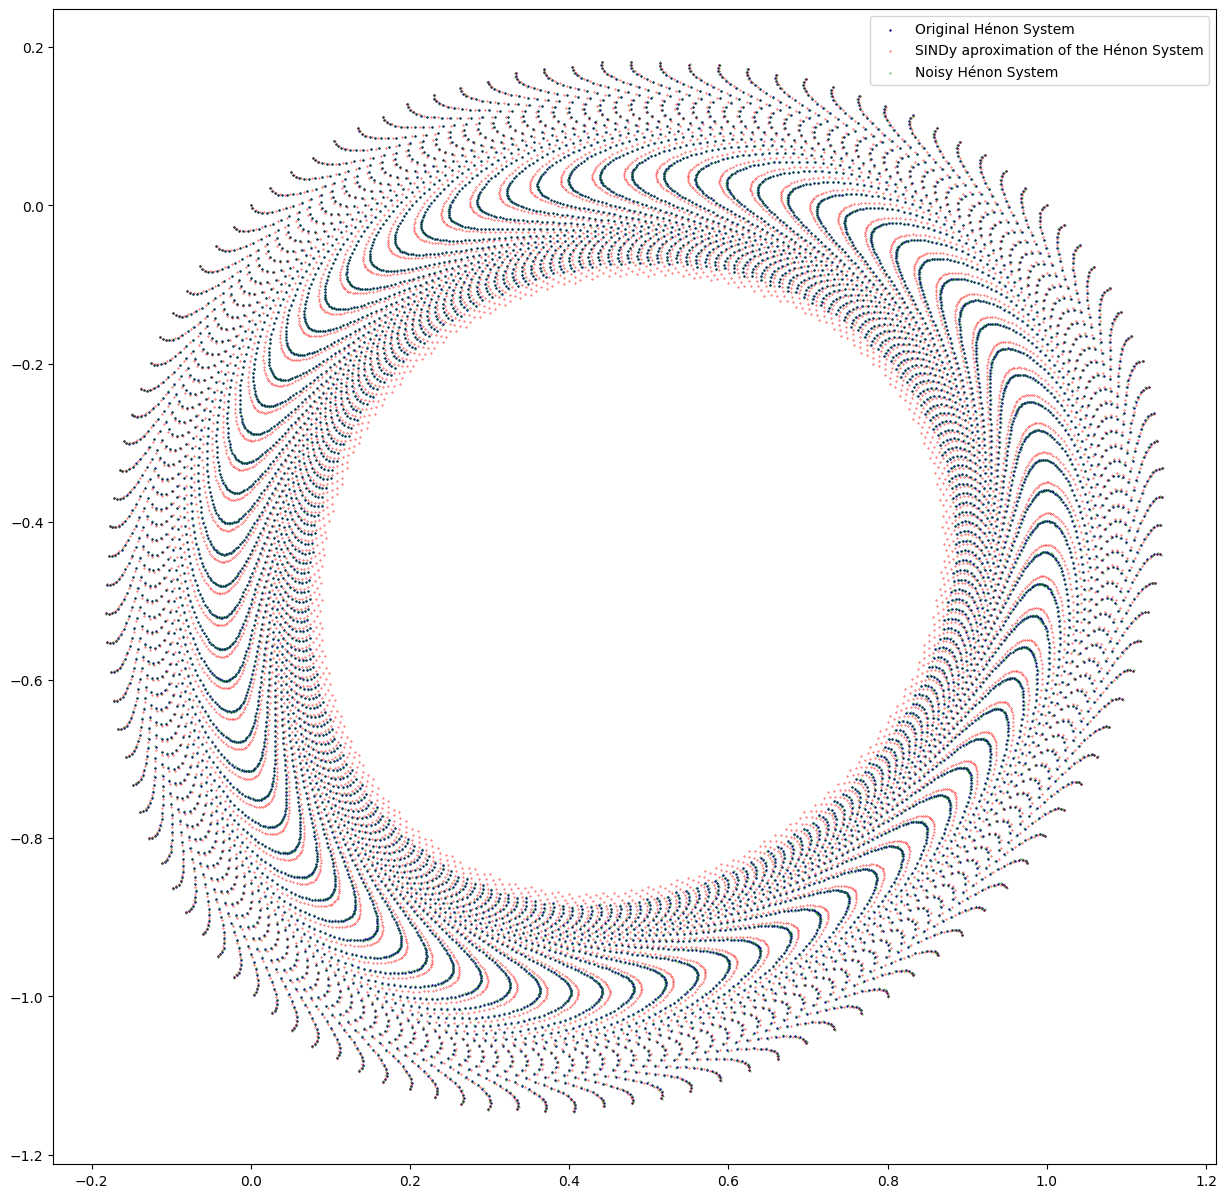

In [174]:
plt.figure(figsize=(15, 15))

plt.scatter(input_data[:, 0], input_data[:, 1], s=0.5, c='navy', label='Original Hénon System')
plt.scatter(sim[:, 0], sim[:, 1], s=0.1, c='red', label='SINDy aproximation of the Hénon System')
plt.scatter(noisy_data[:, 0], noisy_data[:, 1], s=0.1, c='green', label='Noisy Hénon System')

plt.legend()   

In [241]:
def plot_sindy(x=0, y=0, a=1.4, b=0.3, num_points=10000, noise=0):
    input_data = get_henon_mesurements(x=x, y=y, a=a, b=b, num_points=num_points, return_single_matrix=True)
    sim, noisy_data = sindy_pipeline(input_data, noise=noise)

    plt.figure(figsize=(10, 10))
    plt.scatter(sim[:, 0], sim[:, 1], s=0.1, c='red', label='Sparse identification of non-linear dynamics Hénon System')
    plt.scatter(input_data[:, 0], input_data[:, 1], s=0.1, c='navy', label='Original Hénon System')
    #plt.scatter(noisy_data[:, 0], noisy_data[:, 1], s=0.1, c='black', label='Noisy Hénon System')
    plt.legend() 

(x0)[k+1] = 1.000 1 + 1.000 x1[k] + -1.400 x0[k]^2
(x1)[k+1] = 0.300 x0[k]


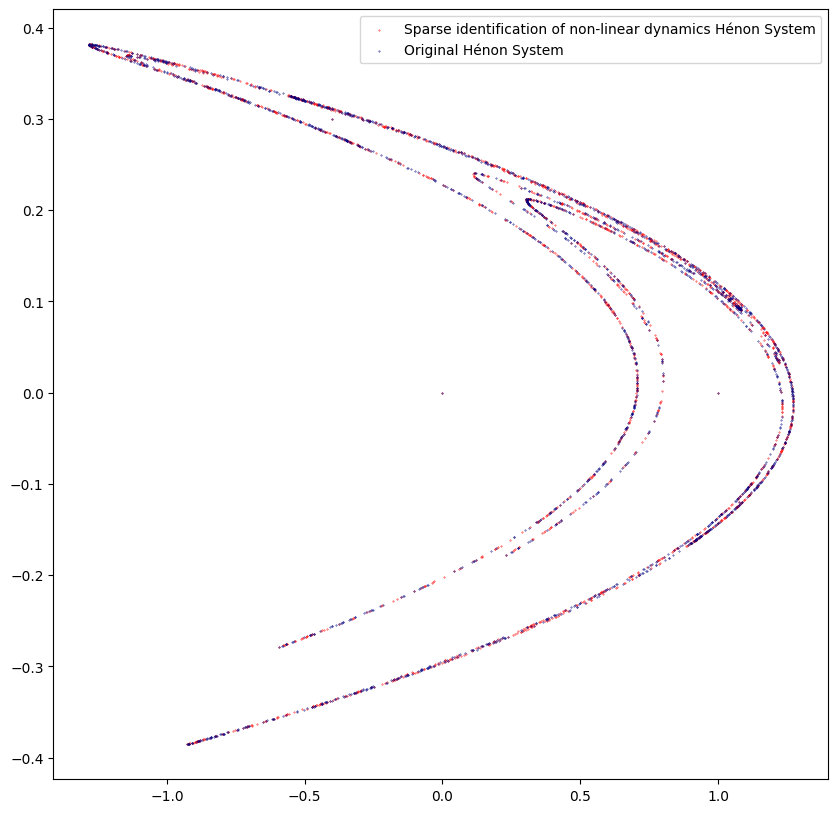

In [247]:
plot_sindy(x=0, y=0, a=1.4, b=0.3, num_points=2000, noise=0)

(x0)[k+1] = 1.000 1 + 1.000 x1[k] + -1.400 x0[k]^2
(x1)[k+1] = 0.300 x0[k]


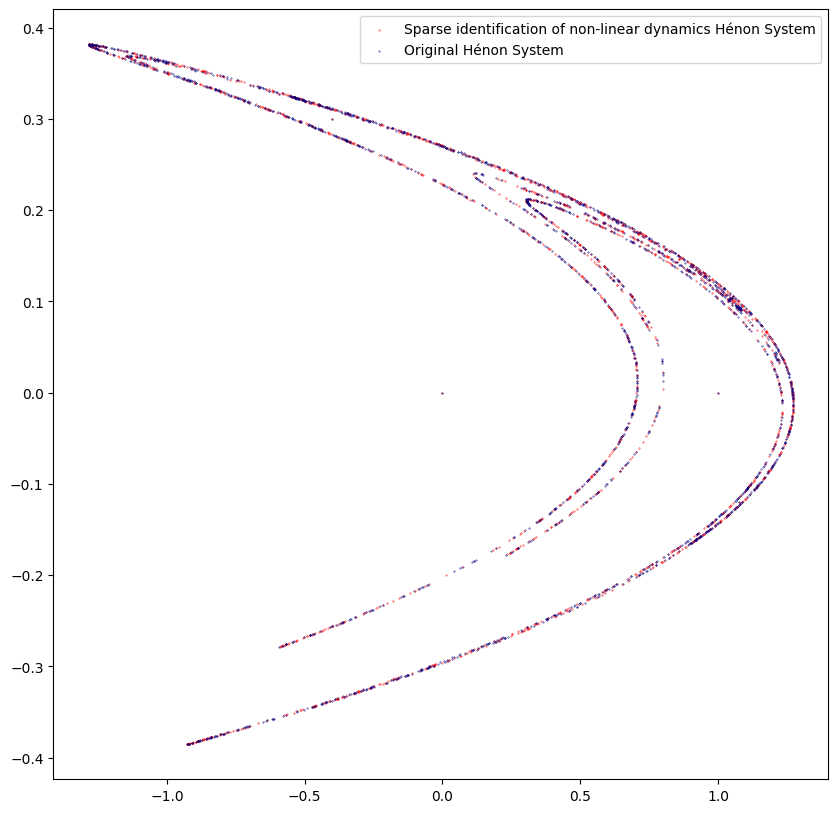

In [251]:
plot_sindy(x=0, y=0, a=1.4, b=0.3, num_points=2000, noise=0.0001)

(x0)[k+1] = 1.000 1 + 1.001 x1[k] + -1.400 x0[k]^2
(x1)[k+1] = 0.300 x0[k]


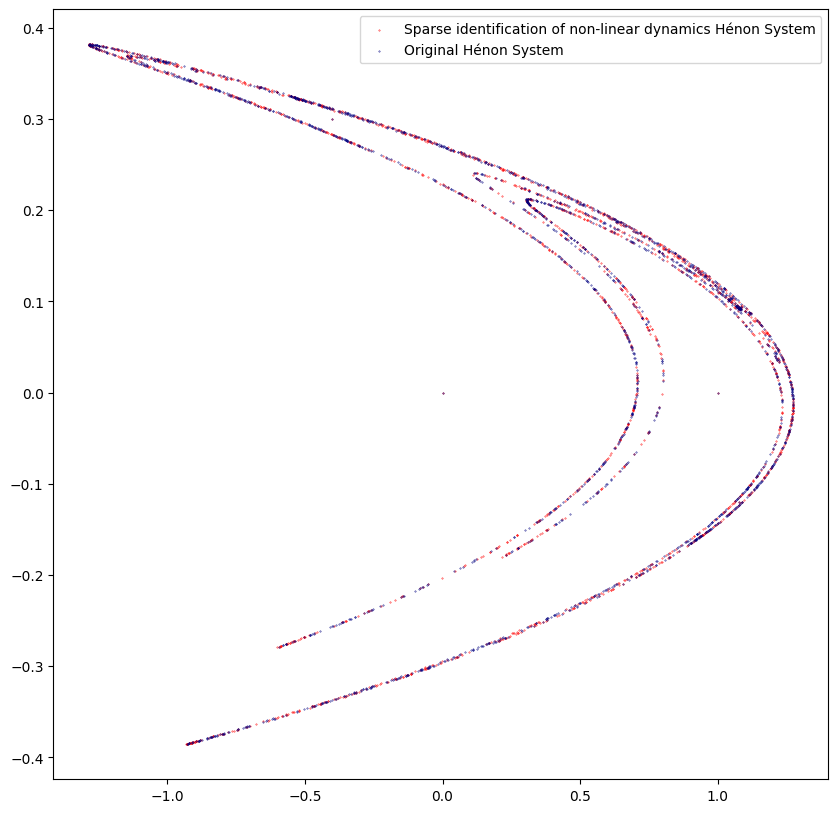

In [250]:
plot_sindy(x=0, y=0, a=1.4, b=0.3, num_points=2000, noise=0.001)

(x0)[k+1] = 1.000 1 + 1.000 x1[k] + -0.200 x0[k]^2
(x1)[k+1] = -1.000 x0[k]


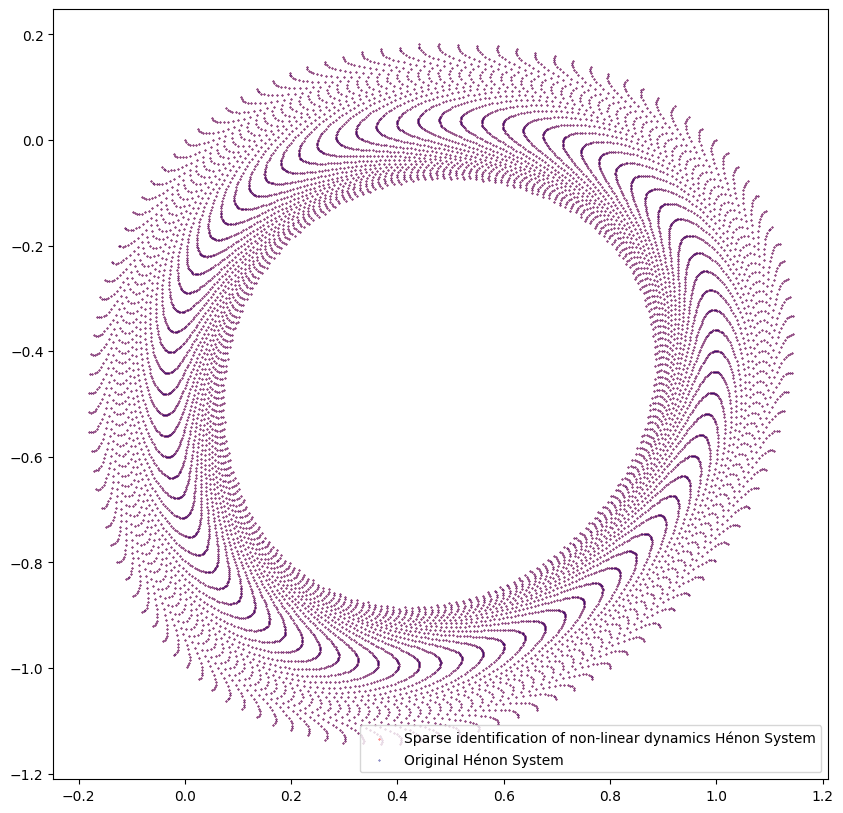

In [252]:
plot_sindy(x=0, y=0, a=0.2, b=-0.9999, num_points=10000, noise=0)

(x0)[k+1] = 1.000 1 + 1.000 x1[k] + -0.200 x0[k]^2
(x1)[k+1] = -1.000 x0[k]


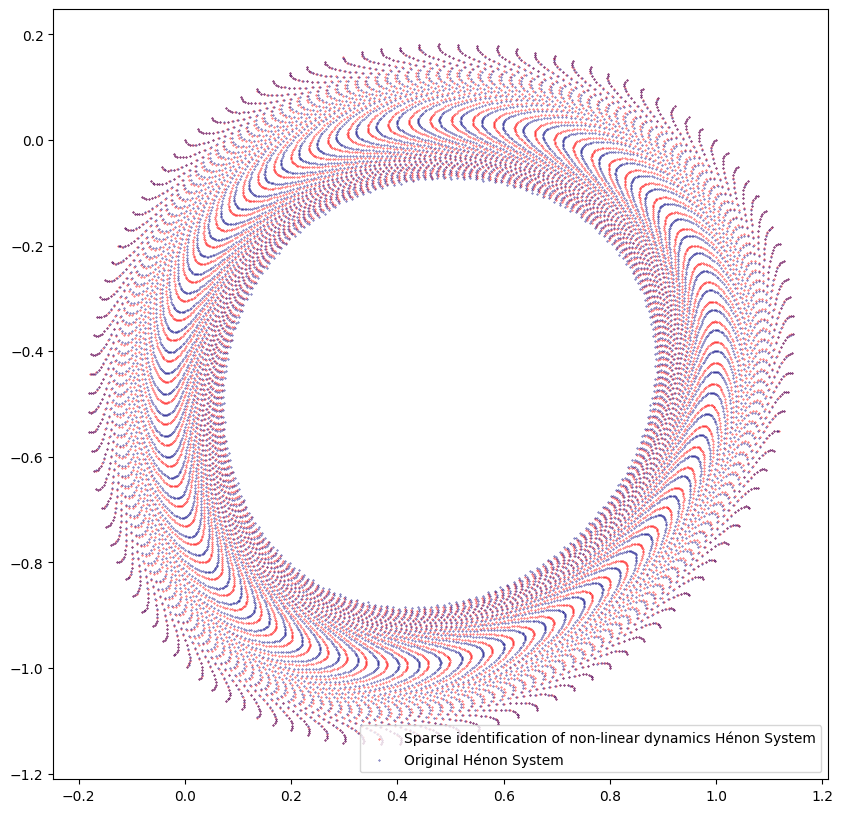

In [253]:
plot_sindy(x=0, y=0, a=0.2, b=-0.9999, num_points=10000, noise=0.0001)

(x0)[k+1] = 1.000 1 + 1.000 x1[k] + -0.200 x0[k]^2
(x1)[k+1] = -1.000 x0[k]


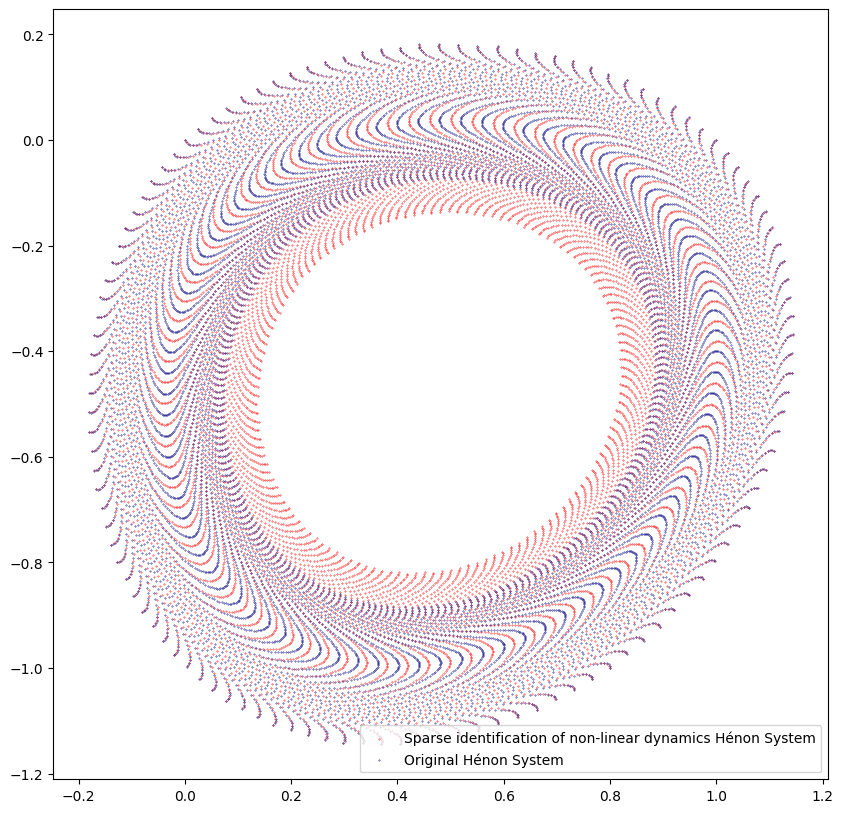

In [256]:
plot_sindy(x=0, y=0, a=0.2, b=-0.9999, num_points=10000, noise=0.001)